In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
from os import path
fname = path.expanduser('~/Documents/Umba/weekly_logins.csv')

In [3]:
!ls -lh "$fname"

-rw-r--r--@ 1 abhibegur  staff   228K Jul 29 13:20 /Users/abhibegur/Documents/Umba/weekly_logins.csv


In [4]:
fields =['User Name', 'Slack Integration', 'Most Used Page', 'Had Free Trial', 'User MRR', 'Weekly Logins', 'Company Name', 'Industry', 'Company Size', 'Territory', 'Sales Call in Trial', 'Zendesk Integration', 'Salesforce Integration', 'Gmail Integration', 'Most common referrer', 'Most Common IP', 'Sales Touches to Close', 'Used Admin Panel', 'Has Issued Support Request']

In [5]:
df = pd.read_csv(fname,header=None,error_bad_lines=False,names=fields)

In [6]:
df = df.drop(df.index[0])

In [7]:
df = df.drop(columns=['User Name','Most Used Page', 'Company Name', 'Industry', 'Company Size', 'Territory', 'Most common referrer', 'Most Common IP' ])

In [8]:
for col,row in df.iteritems():
    df.loc[df[col]=='No', col] = int(0)
    df.loc[df[col] == 'Yes', col] = int(1)
for col in df.columns:
    df[col] = df[col].astype(float)
df.info()
# df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 1 to 1718
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Slack Integration           1718 non-null   float64
 1   Had Free Trial              1718 non-null   float64
 2   User MRR                    1718 non-null   float64
 3   Weekly Logins               1718 non-null   float64
 4   Sales Call in Trial         1718 non-null   float64
 5   Zendesk Integration         1718 non-null   float64
 6   Salesforce Integration      1718 non-null   float64
 7   Gmail Integration           1718 non-null   float64
 8   Sales Touches to Close      1718 non-null   float64
 9   Used Admin Panel            1718 non-null   float64
 10  Has Issued Support Request  1718 non-null   float64
dtypes: float64(11)
memory usage: 161.1 KB


In [9]:
df.head()

,Slack Integration,Had Free Trial,User MRR,Weekly Logins,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
1,0.0,0.0,39.0,2.0,0.0,1.0,0.0,1.0,5.0,0.0,0.0
2,0.0,0.0,39.0,6.0,0.0,1.0,1.0,0.0,16.0,0.0,1.0
3,1.0,1.0,169.0,3.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0
4,0.0,0.0,39.0,2.0,0.0,1.0,0.0,0.0,15.0,0.0,1.0
5,0.0,0.0,1299.0,7.0,0.0,0.0,1.0,0.0,5.0,0.0,1.0


In [10]:
from sklearn import linear_model
import statsmodels.api as sm
x = df[['Slack Integration', 'Had Free Trial', 'User MRR','Sales Call in Trial', 'Zendesk Integration', 'Salesforce Integration', 'Gmail Integration', 'Sales Touches to Close', 'Used Admin Panel', 'Has Issued Support Request']]
y = df['Weekly Logins']

In [11]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print('Intercept: \n', regr.intercept_)
print('Coefficient: \n', regr.coef_)

Intercept: 
 3.8289086056393007
Coefficient: 
 [-2.01904355e-01  6.28278908e+00 -1.48903234e-04  2.93017545e-02
 -9.15145114e-03  7.17178673e-02  1.91574650e-02 -4.85213178e-05
  5.07740383e-03  4.35874662e-02]


In [13]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

[0.02733185 0.04723479 0.12210602 0.06357591 0.04244876 0.05565303
 0.06819167 0.47737546 0.03930409 0.05677842]


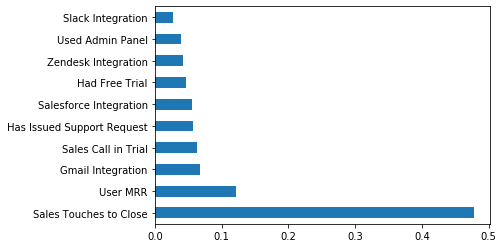

In [14]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Index(['Slack Integration', 'Had Free Trial', 'User MRR', 'Weekly Logins',
       'Sales Call in Trial', 'Zendesk Integration', 'Salesforce Integration',
       'Gmail Integration', 'Sales Touches to Close', 'Used Admin Panel',
       'Has Issued Support Request'],
      dtype='object')


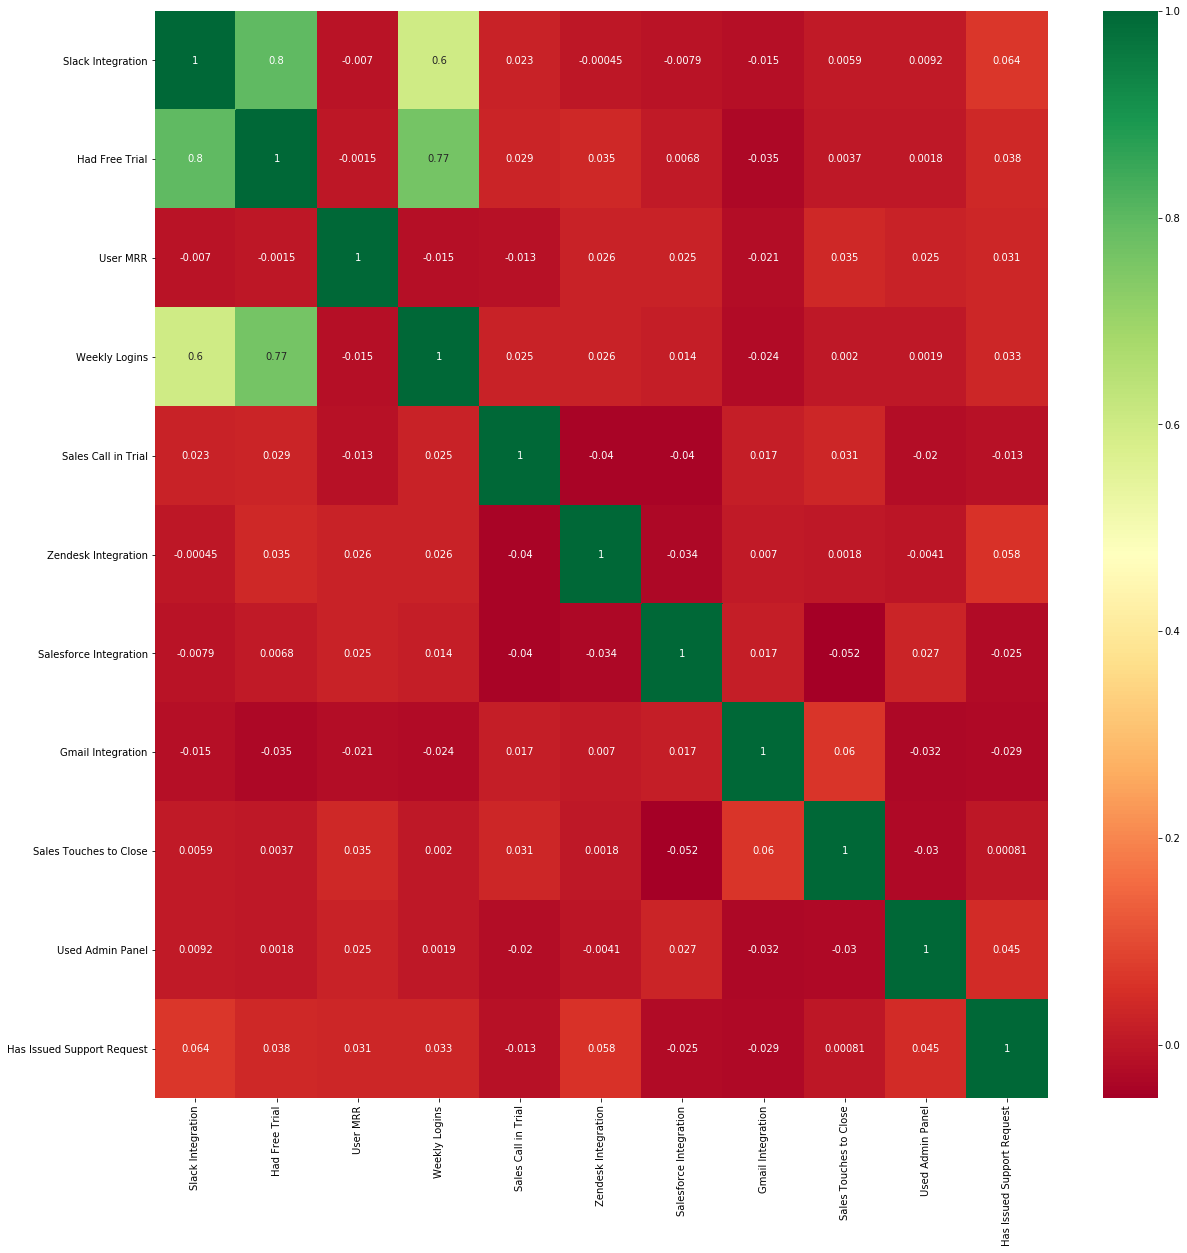

In [15]:
corrmat = df.corr(method='kendall')
print(corrmat.index)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")